In [909]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

Paso 1. Establecemos la cadrícula y asignamos valores de algunas variables

In [910]:
nx = 201
ny = 201
nt = 500
beta = 0.5467
sigma = 0.09
dx = (2 - 0) / (nx - 1)
dy = (2 - 0) / (ny - 1)
dt = sigma * dx * dy / beta

m = 0.131

x = np.round(np.linspace(-2, 2, nx), 2)
y = np.round(np.linspace(-2, 2, ny), 2)

u = np.zeros((ny, nx))
un = np.zeros((ny, nx))

v = np.zeros((ny, nx))
vn = np.zeros((ny, nx))

p = np.ones((ny, nx))*0.5
pn = np.ones((ny, nx))*0.5

q = np.ones((ny, nx))*0.1
qn = np.ones((ny, nx))*0.1

#Establecemos las condiciones iniciales
u[50:100, 50:100] = 1

v[110:160, 110:160] = 1

p[10:60, 10:60:] = 5.7

q[110:160, 110:160] = 0.4

#Aginamos las variables para el sistema
xu = x + np.abs(x[75])
yu = y + np.abs(y[75])

xv = x - np.abs(x[135])
yv = y - np.abs(y[135])

In [911]:
xv

array([-2.7 , -2.68, -2.66, -2.64, -2.62, -2.6 , -2.58, -2.56, -2.54,
       -2.52, -2.5 , -2.48, -2.46, -2.44, -2.42, -2.4 , -2.38, -2.36,
       -2.34, -2.32, -2.3 , -2.28, -2.26, -2.24, -2.22, -2.2 , -2.18,
       -2.16, -2.14, -2.12, -2.1 , -2.08, -2.06, -2.04, -2.02, -2.  ,
       -1.98, -1.96, -1.94, -1.92, -1.9 , -1.88, -1.86, -1.84, -1.82,
       -1.8 , -1.78, -1.76, -1.74, -1.72, -1.7 , -1.68, -1.66, -1.64,
       -1.62, -1.6 , -1.58, -1.56, -1.54, -1.52, -1.5 , -1.48, -1.46,
       -1.44, -1.42, -1.4 , -1.38, -1.36, -1.34, -1.32, -1.3 , -1.28,
       -1.26, -1.24, -1.22, -1.2 , -1.18, -1.16, -1.14, -1.12, -1.1 ,
       -1.08, -1.06, -1.04, -1.02, -1.  , -0.98, -0.96, -0.94, -0.92,
       -0.9 , -0.88, -0.86, -0.84, -0.82, -0.8 , -0.78, -0.76, -0.74,
       -0.72, -0.7 , -0.68, -0.66, -0.64, -0.62, -0.6 , -0.58, -0.56,
       -0.54, -0.52, -0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38,
       -0.36, -0.34, -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 ,
       -0.18, -0.16,

In [912]:
xu

array([-1.5 , -1.48, -1.46, -1.44, -1.42, -1.4 , -1.38, -1.36, -1.34,
       -1.32, -1.3 , -1.28, -1.26, -1.24, -1.22, -1.2 , -1.18, -1.16,
       -1.14, -1.12, -1.1 , -1.08, -1.06, -1.04, -1.02, -1.  , -0.98,
       -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84, -0.82, -0.8 ,
       -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66, -0.64, -0.62,
       -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48, -0.46, -0.44,
       -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 , -0.28, -0.26,
       -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08,
       -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,
        0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,
        0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,
        0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,
        0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,
        0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ,
        1.02,  1.04,

Paso 2. Graficamos las condiciones iniciales

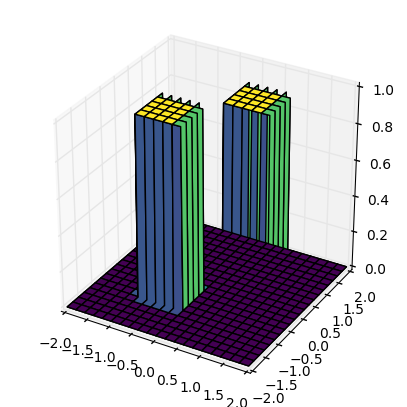

In [913]:
fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u, rstride=10, cstride=10, cmap=cm.viridis)
ax.plot_surface(X, Y, v, rstride=10, cstride=10, cmap=cm.viridis)

Paso 3. Definimos la función

In [914]:
for n in range(nt):
    un = u.copy()
    vn = v.copy()
    pn = p.copy()
    qn = q.copy()
    
    u[1:-1, 1:-1] = un[1:-1, 1:-1] - np.sign(xu[1:-1])*beta*dt/dx*(un[1:-1,1:-1] - un[1:-1, 0:-2])*qn[1:-1, 1:-1] \
                                    - np.sign(yu[1:-1])*beta*dt/dy*(un[1:-1,1:-1] - un[0:-2, 1:-1])*qn[1:-1, 1:-1] \
                                    + dt/dx**2*(un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1, 0:-2]) \
                                    + dt/dy**2*(un[2:,1:-1] - 2*un[1:-1,1:-1] + un[0:-2, 1:-1])
    
    v[1:-1, 1:-1] = vn[1:-1, 1:-1] - np.sign(xv[1:-1])*beta*dt/dx*(vn[1:-1,1:-1] - vn[1:-1, 0:-2])*pn[1:-1, 1:-1] \
                                    - np.sign(xv[1:-1])*beta*dt/dy*(vn[1:-1,1:-1] - vn[0:-2, 1:-1])*pn[1:-1, 1:-1] \
                                    + dt/dx**2*(vn[1:-1,2:] - 2*vn[1:-1,1:-1] + vn[1:-1, 0:-2]) \
                                    + dt/dy**2*(vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[0:-2, 1:-1])
    
    p[1:-1, 1:-1] = un[1:-1, 1:-1]*(1 + m*qn[1:-1, 1:-1]) - pn[1:-1, 1:-1]
    
    q[1:-1, 1:-1] = vn[1:-1, 1:-1]*(1 + m*pn[1:-1, 1:-1]) - qn[1:-1, 1:-1]

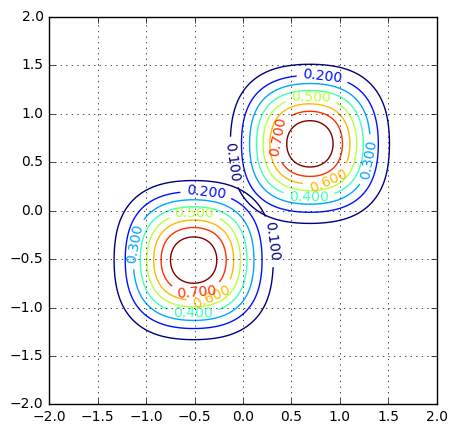

In [915]:
plt.figure(figsize=(5, 5), dpi=100)
X, Y = np.meshgrid(x, y)
CS_u = plt.contour(X, Y, u, 10)
CS_v = plt.contour(X, Y, v, 10)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.clabel(CS_u, inline=1, fontsize=10)
plt.clabel(CS_v, inline=1, fontsize=10)
plt.grid(True)

In [916]:
p[10:60, 10:60:]

array([[ 5.69999997,  5.69999995,  5.69999991, ...,  5.6996527 ,
         5.69963985,  5.69962786],
       [ 5.69999995,  5.69999991,  5.69999986, ...,  5.6995145 ,
         5.69949655,  5.69947981],
       [ 5.69999991,  5.69999986,  5.69999978, ...,  5.69932631,
         5.69930142,  5.6992782 ],
       ..., 
       [ 5.6996527 ,  5.6995145 ,  5.69932631, ...,  0.98715891,
         0.86331115,  0.75613576],
       [ 5.69963985,  5.69949655,  5.69930142, ...,  0.86331102,
         0.73523266,  0.62433196],
       [ 5.69962786,  5.69947981,  5.69927819, ...,  0.7561355 ,
         0.62433182,  0.51013102]])

In [917]:
q

array([[ 0.1       ,  0.1       ,  0.1       , ...,  0.1       ,
         0.1       ,  0.1       ],
       [ 0.1       ,  0.1       ,  0.1       , ...,  0.1       ,
         0.1       ,  0.1       ],
       [ 0.1       ,  0.1       ,  0.1       , ...,  0.1       ,
         0.1       ,  0.1       ],
       ..., 
       [ 0.1       ,  0.1       ,  0.1       , ...,  0.09999815,
         0.09999911,  0.1       ],
       [ 0.1       ,  0.1       ,  0.1       , ...,  0.09999911,
         0.09999957,  0.1       ],
       [ 0.1       ,  0.1       ,  0.1       , ...,  0.1       ,
         0.1       ,  0.1       ]])

In [918]:
v

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   6.82271743e-36,   1.72579744e-35, ...,
          6.39138941e-21,   3.09718949e-21,   0.00000000e+00],
       [  0.00000000e+00,   1.72579744e-35,   4.36372382e-35, ...,
          1.57162472e-20,   7.61628389e-21,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   6.39052780e-21,   1.57173985e-20, ...,
          7.49036320e-07,   3.64370836e-07,   0.00000000e+00],
       [  0.00000000e+00,   3.09751325e-21,   7.61866657e-21, ...,
          3.64370835e-07,   1.77248060e-07,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [919]:
u

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.23201942e-09,   2.57125018e-09, ...,
          1.77320228e-19,   7.42643895e-20,   0.00000000e+00],
       [  0.00000000e+00,   2.57125018e-09,   5.36617227e-09, ...,
          3.71610808e-19,   1.55646167e-19,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   1.77309882e-19,   3.71606824e-19, ...,
          9.27907643e-30,   3.82102288e-30,   0.00000000e+00],
       [  0.00000000e+00,   7.42632444e-20,   1.55651176e-19, ...,
          3.82102283e-30,   1.57303885e-30,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])